In [1]:
# !pip install numpy
# !pip install sympy 
# !pip install pandas
# !pip install openpyxl
# !pip install pyarrow
# !pip install matplotlib

In [2]:
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [45]:
# https://www.math.stonybrook.edu/~tony/tides/harmonic.html
# w is used in place of ω
# O is used in place of Ω
w1 = 15 # deg/hr
w2 = 0.54901653 # deg/hr
w3 = 0.04106864 # deg/hr
O = 2*(w1 - w2 + w3) # 28.984 deg/hr (from project description)
S = 30 # S2 from link, effect of sun on tides
K1 = w1 + w3

to_rads = np.pi / 180
to_degs = 180 / np.pi

h0, a, b, c, d = sy.symbols("h0, a, b, c, d")

In [4]:
bristol_data = pd.read_excel(sys.path[0] + "\..\TideData.xlsx", sheet_name = "Bristol")

donaghadee_data = pd.read_excel(sys.path[0] + "\..\TideData.xlsx", sheet_name = "Donaghadee")

In [5]:
def lin_eq(h, t):
    return sy.Eq(h0 + a*sy.cos(O*t*to_rads) + b*sy.sin(O*t*to_rads) 
                 + c*sy.cos(S*t*to_rads) + d*sy.sin(S*t*to_rads), h)

def solve_system(heights_times):
    eqs = []
    for h_t in heights_times:
        eqs.append(lin_eq(h_t[0], h_t[1]))
    return sy.solve([eqs[0], eqs[1], eqs[2], eqs[3], eqs[4]], (h0,a,b,c,d), dict=True)[0]

def solve_bristol(sp, inc):
    vals = [[bristol_data["h"][sp], bristol_data['t'][sp]], 
            [bristol_data['h'][sp+inc], bristol_data['t'][sp+inc]], 
            [bristol_data['h'][sp+2*inc], bristol_data['t'][sp+2*inc]],
            [bristol_data['h'][sp+3*inc], bristol_data['t'][sp+3*inc]],
            [bristol_data['h'][sp+4*inc], bristol_data['t'][sp+4*inc]]]

    sol = solve_system(vals)
    #sy.pprint(sol)
    return sol

def solve_donaghadee(sp, inc):
    vals = [[donaghadee_data["h"][sp], donaghadee_data['t'][sp]], 
            [donaghadee_data['h'][sp+inc], donaghadee_data['t'][sp+inc]], 
            [donaghadee_data['h'][sp+2*inc], donaghadee_data['t'][sp+2*inc]],
            [donaghadee_data['h'][sp+3*inc], donaghadee_data['t'][sp+3*inc]],
            [donaghadee_data['h'][sp+4*inc], donaghadee_data['t'][sp+4*inc]]]

    sol = solve_system(vals)
    #sy.pprint(sol)
    return sol

# def pred_times_highs_lows(a, b, n):
#     t = (1/O)*(np.arctan(float(b/a))+np.pi*n)*to_degs # get arg and convert it back into degrees, then use 1/Ω for t
#     return t

# def tide_high_or_low(a, b, t):
#     hii_t = -a*O*O*np.cos(O*t*to_rads) - b*O*O*np.sin(O*t*to_rads)
#     if hii_t > 0:
#         return "low"
#     else:
#         return "high"
    
# def pred_height(h0, a, b, t):
#     return h0 + a*np.cos(to_rads*O*(t)) + b*np.sin(to_rads*O*(t))

In [6]:
def get_local_max_minima(results, endpoint=336):
    t_vals = np.linspace(0, endpoint, 20160) # 1 point per minute for 2 weeks by default
    h_vals = results[h0] + results[a]*np.cos(O*t_vals*to_rads) + results[b]*np.sin(O*t_vals*to_rads) + results[c]*np.cos(S*t_vals*to_rads) + results[d]*np.sin(S*t_vals*to_rads)
    predictions = {'Time' : [], 'Height' : [], 'High_or_Low' : []}
    for h in range(1,len(h_vals)-1):
        if h_vals[h-1] < h_vals[h] and h_vals[h] > h_vals[h+1]:
            print("High tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("high")
        elif h_vals[h-1] > h_vals[h] and h_vals[h] < h_vals[h+1]:
            print("Low tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("low")
    return pd.DataFrame(data = predictions)

In [91]:
results = solve_bristol_OSK1(sp = 0, inc = 3)
sy.pprint(results)

[Eq(-0.496988562744272*a + 0.867757090723771*b - 0.559192903470747*c + 0.829037572555042*d + 0.466853594700582*e + 0.88433462055669*f + h0, 2.2), Eq(0.191353298089753*a - 0.981521225094075*b + 0.551936985312059*c - 0.833885822067168*d + 0.888283202529817*e - 0.459296148583212*f + h0, 11.7), Eq(-0.167681464157894*a + 0.985841227874887*b - 0.77714596145697*c + 0.629320391049838*d - 0.306168979759555*e - 0.951977182411949*f + h0, 2.4), Eq(-0.125054049387708*a - 0.992149930570847*b + 0.793353340291234*c - 0.608761429008722*d - 0.959622777900824*e + 0.281290106711748*f + h0, 11.5), Eq(0.115463043003508*a + 0.993311776684627*b - 0.951056516295154*c + 0.309016994374947*d + 0.101425921060431*e + 0.994843094430998*f + h0, 2.6), Eq(-0.279346843176391*a - 0.96019026302467*b + 0.987688340595137*c - 0.156434465040234*d + 0.999950561977102*e - 0.0099435205876724*f + h0, 10.6), Eq(0.229240151440363*a + 0.973369895244146*b - 0.974370064785236*c - 0.224951054343863*d + 0.194227868741811*e - 0.980956438

In [92]:
preds_df = get_local_max_minima_OSK1(results)

Low tide, t = 3.183491244605387, h = 1.60290738615512
High tide, t = 9.400466292970881, h = 12.0680590654302
Low tide, t = 15.567438861054615, h = 2.05301711074960
High tide, t = 21.717743935711095, h = 11.8022908593974
Low tide, t = 27.918051490649336, h = 1.87088461070317
High tide, t = 34.16836152586934, h = 11.8280580502404
Low tide, t = 40.35200158738032, h = 2.32704940919985
High tide, t = 46.50230666203681, h = 11.4595127396688
Low tide, t = 52.70261421697505, h = 2.21626338849431
High tide, t = 58.9695917456223, h = 11.5277174996140
Low tide, t = 65.1865667939878, h = 2.63705080304531
High tide, t = 71.33687186864428, h = 11.0893327304325
Low tide, t = 77.55384691700976, h = 2.58699784424635
High tide, t = 83.83749193908427, h = 11.2219579624790
Low tide, t = 90.08780197430428, h = 2.92114677504784
High tide, t = 96.27144203581527, h = 10.7599021408832
Low tide, t = 102.48841708418075, h = 2.91443253866964
High tide, t = 108.78872959968253, h = 10.9790710330333
Low tide, t = 11

In [93]:
preds_df['Forecasted Time'] = bristol_data['t']
preds_df['Forecasted Height'] = bristol_data['h']
preds_df['Time Error'] = preds_df['Time'] - preds_df['Forecasted Time']
preds_df['Height Error'] = preds_df['Height'] - preds_df['Forecasted Height']

In [94]:
preds_df.head(28)

,Time,Height,High_or_Low,Forecasted Time,Forecasted Height,Time Error,Height Error
0,3.183491,1.60290738615512,low,4.133333,2.2,-0.949842,-0.597092613844876
1,9.400466,12.0680590654302,high,9.833333,12.0,-0.432867,0.0680590654301501
2,15.567439,2.05301711074960,low,16.366667,2.4,-0.799228,-0.346982889250398
3,21.717744,11.8022908593974,high,22.116667,11.7,-0.398923,0.102290859397367
4,27.918051,1.87088461070317,low,28.450000,2.3,-0.531949,-0.429115389296826
5,34.168362,11.8280580502404,high,34.283333,11.7,-0.114972,0.128058050240357
6,40.352002,2.32704940919985,low,40.700000,2.4,-0.347998,-0.0729505908001453
7,46.502307,11.4595127396688,high,46.566667,11.4,-0.064360,0.0595127396688095
8,52.702614,2.21626338849431,low,52.866667,2.4,-0.164052,-0.183736611505694
9,58.969592,11.5277174996140,high,58.750000,11.5,0.219592,0.0277174996140204


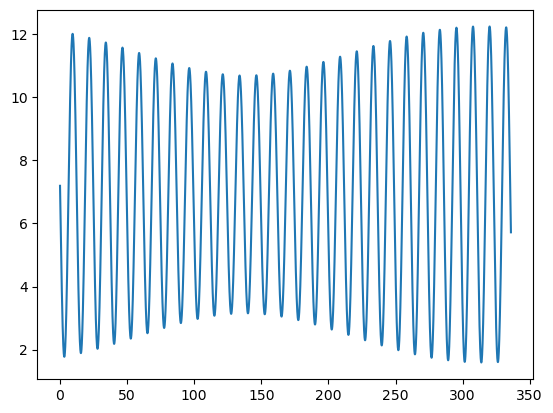

In [95]:

def plot_equation(results):
    t_vals = np.linspace(0, 336, 20160)
    h_vals = results[h0] + results[a]*np.cos(O*t_vals*to_rads) + results[b]*np.sin(O*t_vals*to_rads) + results[c]*np.cos(S*t_vals*to_rads) + results[d]*np.sin(S*t_vals*to_rads)
    #print(h_vals)
    p = plt.plot(t_vals, h_vals)
    #p.savefig("five_terms.pdf")
    return h_vals
    
h_vals = plot_equation(results)

In [12]:
sample_size = 1
a_tot = 0
b_tot = 0 
h0_tot = 0
count = 0
for i in range(0,sample_size,1):
    count += 1
    results = solve_bristol(sp = 0, inc = 5)
    sy.pprint(results)
    a_tot += results[a]
    b_tot += results[b]
    h0_tot += results[h0]
    
a_avg = a_tot/(count)
b_avg = b_tot/(count)
h0_avg = h0_tot/(count)
print(a_avg)
print(b_avg)
print(h0_avg)
print(count)

{a: 0.677412682226402, b: -3.92164374930563, c: -0.0226484176902362, d: -1.135
53991887915, h₀: 6.86844094951666}
0.677412682226402
-3.92164374930563
6.86844094951666
1


## Donaghadee

In [90]:
h0, a, b, c, d, e, f = sy.symbols("h0, a, b, c, d, e, f")


def lin_eq_OSK1(h, t):
    return sy.Eq(h0 + a*sy.cos(O*t*to_rads) + b*sy.sin(O*t*to_rads) 
                 + c*sy.cos(S*t*to_rads) + d*sy.sin(S*t*to_rads)
                 + e*sy.cos(K1*t*to_rads) + f*sy.sin(K1*t*to_rads), h)

def solve_system_OSK1(heights_times):
    eqs = []
    for h_t in heights_times:
        eqs.append(lin_eq_OSK1(h_t[0], h_t[1]))
    print(eqs)
    return sy.solve([eqs[0], eqs[1], eqs[2], eqs[3], eqs[4], eqs[5], eqs[6]], (h0,a,b,c,d,e,f), dict=True)[0]

def solve_bristol_OSK1(sp, inc):
    vals = [[bristol_data["h"][sp], bristol_data['t'][sp]], 
            [bristol_data['h'][sp+inc], bristol_data['t'][sp+inc]], 
            [bristol_data['h'][sp+2*inc], bristol_data['t'][sp+2*inc]],
            [bristol_data['h'][sp+3*inc], bristol_data['t'][sp+3*inc]],
            [bristol_data['h'][sp+4*inc], bristol_data['t'][sp+4*inc]],
            [bristol_data['h'][sp+5*inc], bristol_data['t'][sp+5*inc]],
            [bristol_data['h'][sp+6*inc], bristol_data['t'][sp+6*inc]]]

    sol = solve_system_OSK1(vals)
    #sy.pprint(sol)
    return sol

def solve_donaghadee_OSK1(sp, inc):
    vals = [[donaghadee_data["h"][sp], donaghadee_data['t'][sp]], 
            [donaghadee_data['h'][sp+inc], donaghadee_data['t'][sp+inc]], 
            [donaghadee_data['h'][sp+2*inc], donaghadee_data['t'][sp+2*inc]],
            [donaghadee_data['h'][sp+3*inc], donaghadee_data['t'][sp+3*inc]],
            [donaghadee_data['h'][sp+4*inc], donaghadee_data['t'][sp+4*inc]],
            [donaghadee_data['h'][sp+5*inc], donaghadee_data['t'][sp+5*inc]],
            [donaghadee_data['h'][sp+6*inc], donaghadee_data['t'][sp+6*inc]]]

    sol = solve_system_OSK1(vals)
    #sy.pprint(sol)
    return sol

In [70]:
def get_local_max_minima_OSK1(results, endpoint=336):
    t_vals = np.linspace(0, endpoint, 20160) # 1 point per minute for 2 weeks by default
    h_vals = (results[h0] + results[a]*np.cos(O*t_vals*to_rads) + results[b]*np.sin(O*t_vals*to_rads) 
              + results[c]*np.cos(S*t_vals*to_rads) + results[d]*np.sin(S*t_vals*to_rads)
              + results[e]*np.cos(K1*t_vals*to_rads) + results[f]*np.sin(K1*t_vals*to_rads) )
    
    predictions = {'Time' : [], 'Height' : [], 'High_or_Low' : []}
    for h in range(1,len(h_vals)-1):
        if h_vals[h-1] < h_vals[h] and h_vals[h] > h_vals[h+1]:
            print("High tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("high")
        elif h_vals[h-1] > h_vals[h] and h_vals[h] < h_vals[h+1]:
            print("Low tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("low")
    return pd.DataFrame(data = predictions)

In [82]:
results = solve_donaghadee_OSK1(sp = 1, inc = 3)
sy.pprint(results)

[Eq(-0.630585095813025*a - 0.776120117596805*b - 0.515038074910054*c - 0.857167300702112*d - 0.497385558598317*e + 0.867529599551416*f + h0, 0.8), Eq(0.596329758485246*a + 0.802739571184159*b + 0.165047605860679*c + 0.986285601537231*d + 0.750735758225793*e + 0.660602619826128*f + h0, 3.4), Eq(-0.744668717021033*a - 0.667434267842347*b - 0.0436193873653378*c - 0.999048221581858*d + 0.714407545822652*e - 0.69972984677778*f + h0, 0.7), Eq(0.765959739695051*a + 0.642888541791102*b - 0.250380004054442*c + 0.968147640378108*d - 0.575616618896419*e - 0.817719700172532*f + h0, 3.8), Eq(-0.811773703147922*a - 0.583972135360506*b + 0.484809620246334*c - 0.874619707139397*d - 0.889944387905057*e + 0.45606905884558*f + h0, 1.0), Eq(0.764375884290499*a + 0.644770895369136*b - 0.793353340291236*c + 0.60876142900872*d + 0.252277678881393*e + 0.967654883074651*f + h0, 3.2), Eq(-0.800339174617616*a - 0.599547500680633*b + 0.927183854566787*c - 0.374606593415912*d + 0.994334456465049*e - 0.106296701201

In [83]:
dpreds_df = get_local_max_minima_OSK1(results)

High tide, t = 1.7334193164343468, h = 3.36171644802467
Low tide, t = 7.733716950245547, h = 0.789365482632158
High tide, t = 14.017361972320055, h = 3.84575669928530
Low tide, t = 20.301006994394562, h = 0.750801887834557
High tide, t = 26.301304628205763, h = 3.42642144241397
Low tide, t = 32.26826727516246, h = 0.775650245322068
High tide, t = 38.53524480380971, h = 3.87602735078231
Low tide, t = 44.83555731931147, h = 0.698685651658810
High tide, t = 50.852522446549926, h = 3.43478871703090
Low tide, t = 56.802817600079365, h = 0.823441269515357
High tide, t = 63.03646014187211, h = 3.83861041999583
Low tide, t = 69.37010764422838, h = 0.710061700604045
High tide, t = 75.42040775832135, h = 3.38667077474651
Low tide, t = 81.33736792499627, h = 0.931707221575447
High tide, t = 87.55434297336177, h = 3.73512754273336
Low tide, t = 93.90465796914529, h = 0.782564268063581
High tide, t = 100.00496056352002, h = 3.28593494669587
Low tide, t = 105.90525323676769, h = 1.09571437327241
Hig

In [84]:
dpreds_df['Forecasted Time'] = donaghadee_data['t']
dpreds_df['Forecasted Height'] = donaghadee_data['h']
dpreds_df['Time Error'] = dpreds_df['Time'] - dpreds_df['Forecasted Time']
dpreds_df['Height Error'] = dpreds_df['Height'] - dpreds_df['Forecasted Height']

In [85]:
dpreds_df.head(28)

,Time,Height,High_or_Low,Forecasted Time,Forecasted Height,Time Error,Height Error
0,1.733419,3.36171644802467,high,2.116667,3.4,-0.383247,-0.0382835519753257
1,7.733717,0.789365482632158,low,7.966667,0.8,-0.232950,-0.0106345173678422
2,14.017362,3.84575669928530,high,14.316667,4.0,-0.299305,-0.154243300714699
3,20.301007,0.750801887834557,low,20.300000,0.7,0.001007,0.0508018878345573
4,26.301305,3.42642144241397,high,26.683333,3.4,-0.382029,0.0264214424139655
5,32.268267,0.775650245322068,low,32.583333,0.8,-0.315066,-0.0243497546779315
6,38.535245,3.87602735078231,high,38.883333,3.9,-0.348089,-0.0239726492176886
7,44.835557,0.698685651658810,low,44.916667,0.7,-0.081109,-0.00131434834119037
8,50.852522,3.43478871703090,high,51.283333,3.4,-0.430811,0.0347887170309042
9,56.802818,0.823441269515357,low,57.250000,0.9,-0.447182,-0.0765587304846427


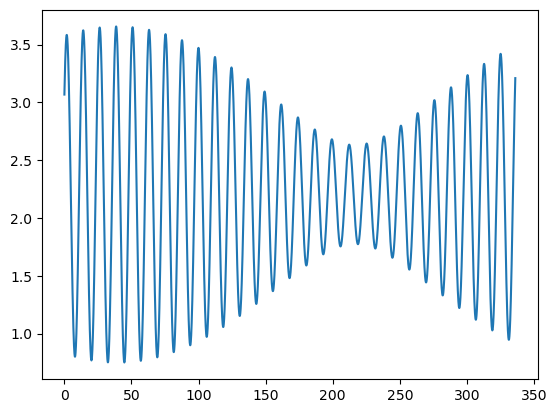

In [74]:
p = plot_equation(results)

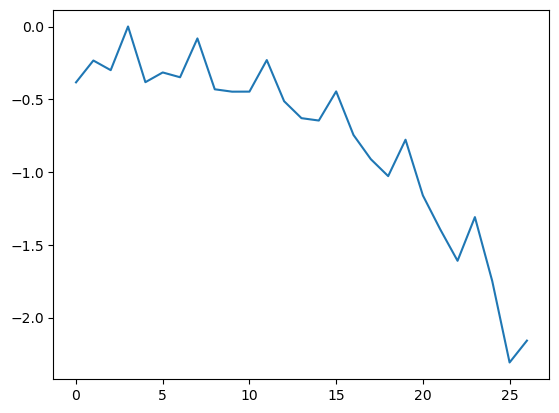

In [87]:
plt.plot(dpreds_df['Time Error'])

C:\Users\ryane\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


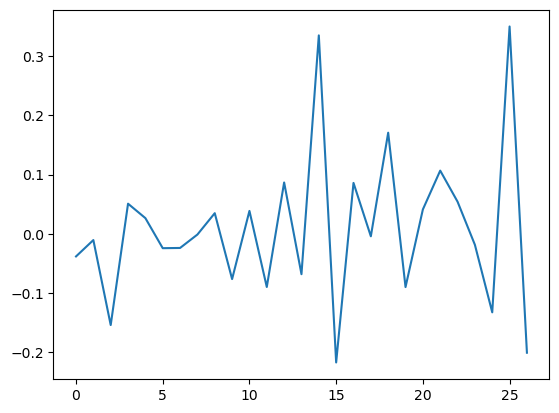

In [88]:
plt.plot(dpreds_df['Height Error'])